In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
from sklearn.datasets import make_regression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
files = [file for file in os.listdir(r'C:\\Users\\Abize\\OneDrive\\Bureau\\SIMPLON\\\Bien_immo_Django\\data')]
for file in files:
    print(file)

Promoteur imo.csv
Promoteur_imo.csv
Promoteur_imo_copy.csv
Promoteur_imo_copy_modifier.csv


In [4]:
data = pd.read_csv("promoteur_immo_V2.csv")

## Connexion à ma base de données 

In [5]:
import sqlite3 as db
# Create your connection.
#df = pd.read_csv('promoteur_immo_V2.csv', delimiter=',')
df = pd.read_csv('promoteur_immo_V2.csv', names =['ville', 'departement'])
tf = df[df.ville == True]
conn = db.connect(r'C:\Users\Abize\OneDrive\Bureau\SIMPLON\Bien_immo_Django\db.sqlite3')
tf.to_sql(name='upload_csv_upload_csv', con=conn ,if_exists='append')

## Un peu d'analyse 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2751 entries, 0 to 2750
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2751 non-null   int64  
 1   id_lot              2751 non-null   object 
 2   nb_piece            2751 non-null   float64
 3   typologie           2751 non-null   object 
 4   prix_tva_reduite    425 non-null    float64
 5   prix_tva_normale    2737 non-null   float64
 6   prix_HT             2737 non-null   float64
 7   prix_m2_HT          2737 non-null   float64
 8   prix_m2_TTC         2737 non-null   float64
 9   surface             2751 non-null   float64
 10  etage               2608 non-null   float64
 11  orientation         2751 non-null   object 
 12  exterieur           2751 non-null   bool   
 13  balcony             2751 non-null   bool   
 14  garden              2751 non-null   bool   
 15  parking             2751 non-null   float64
 16  nom_pr

In [10]:
# Voir par rapport à une commune
data_clermont = data[data['ville']=='Clermont-Ferrand']
data_clermont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 25 to 117
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  34 non-null     int64  
 1   id_lot              34 non-null     object 
 2   nb_piece            34 non-null     float64
 3   typologie           34 non-null     object 
 4   prix_tva_reduite    34 non-null     float64
 5   prix_tva_normale    34 non-null     float64
 6   prix_HT             34 non-null     float64
 7   prix_m2_HT          34 non-null     float64
 8   prix_m2_TTC         34 non-null     float64
 9   surface             34 non-null     float64
 10  etage               34 non-null     float64
 11  orientation         34 non-null     object 
 12  exterieur           34 non-null     bool   
 13  balcony             34 non-null     bool   
 14  garden              34 non-null     bool   
 15  parking             34 non-null     float64
 16  nom_prog

In [27]:
data_clermont[['typologie']].value_counts()

typologie  
Appartement    66
Maison          2
dtype: int64

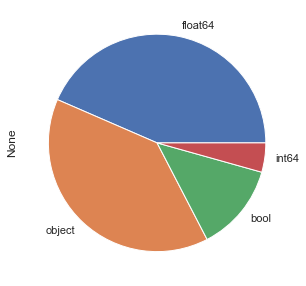

In [29]:
data_clermont.dtypes.value_counts().plot.pie();

<AxesSubplot:ylabel='None'>

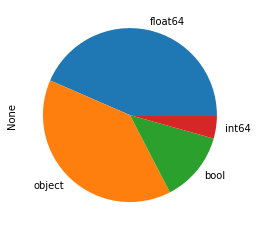

In [19]:
data.dtypes.value_counts().plot.pie()

In [30]:
data_clermont.isna().sum()

id                     0
id_lot                 0
nb_piece               0
typologie              0
prix_tva_reduite      34
prix_tva_normale       1
prix_HT                1
prix_m2_HT             1
prix_m2_TTC            1
surface                0
etage                  2
orientation            0
exterieur              0
balcony                0
garden                 0
parking                0
nom_programme          0
ville                  0
departement            0
date_fin_programme     0
adresse_entiere        0
promoteur              0
date_extraction        0
dtype: int64

In [31]:
data_clermont.describe().T

,count,mean,std,min,25%,50%,75%,max
id,68.0,46.205882,39.925886,0.00,16.750000,33.500000,50.25,121.00
nb_piece,68.0,3.250000,0.887307,1.00,3.000000,3.000000,4.00,5.00
prix_tva_reduite,34.0,206358.529412,56187.293295,139788.00,161546.750000,191878.000000,229374.25,378042.00
prix_tva_normale,67.0,282308.962298,116123.512457,155000.00,203200.379147,259999.620853,314000.00,671500.00
prix_HT,67.0,235257.468060,96769.593655,129166.67,169333.645000,216666.350000,261666.67,559583.33
prix_m2_HT,67.0,3226.858507,486.225715,2494.83,2857.225000,3206.370000,3441.83,4629.63
prix_m2_TTC,67.0,3872.230746,583.471848,2993.79,3428.670000,3847.640000,4130.20,5555.56
surface,68.0,72.349559,22.093971,27.90,59.480000,70.360000,85.07,128.97
etage,66.0,3.106061,1.763988,0.00,2.000000,3.000000,4.75,6.00
parking,68.0,0.985294,0.121268,0.00,1.000000,1.000000,1.00,1.00


In [34]:
def indicateur(series: pd.Series):
    if series.dtype == 'int64' or series.dtype=='float64':
        print('mean : \t', series.mean())
        print("****************************************")
        print('variance:  \t', series.var())
        print("****************************************")
        print('std : \t', series.std())
        print("****************************************")
        print('median : \t', series.median())
        print("****************************************")
        print('iqr : \t', series.quantile(0.75) - series.quantile(0.25))
        print("****************************************")
        print('mode : \t', series.mode().values)
        print("****************************************")
        print('skewness: : \t', series.skew())
        return 
data_clermont_prix_normal = indicateur(data_clermont["prix_tva_normale"])

mean : 	 282308.96229751717
****************************************
variance:  	 13484670145.43148
****************************************
std : 	 116123.51245734638
****************************************
median : 	 259999.6208530806
****************************************
iqr : 	 110799.62085308053
****************************************
mode : 	 [180999.81042654 246000.        ]
****************************************
skewness: : 	 1.5959639170503377


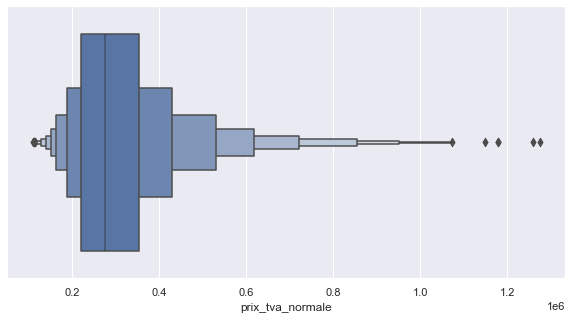

In [32]:
sns.set(rc = {'figure.figsize': (10, 5)}) 
f, axes = plt.subplots()
sns.boxenplot(data['prix_tva_normale']);
plt.show();

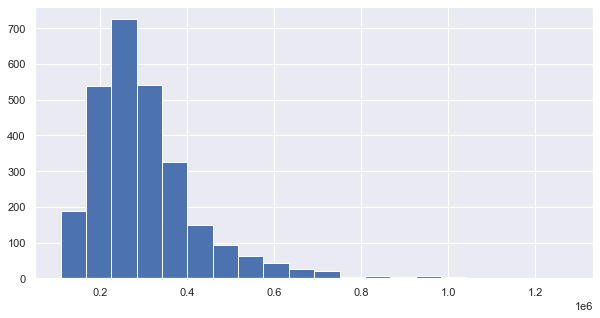

In [33]:
data["prix_tva_normale"].hist(bins=20)
plt.show()

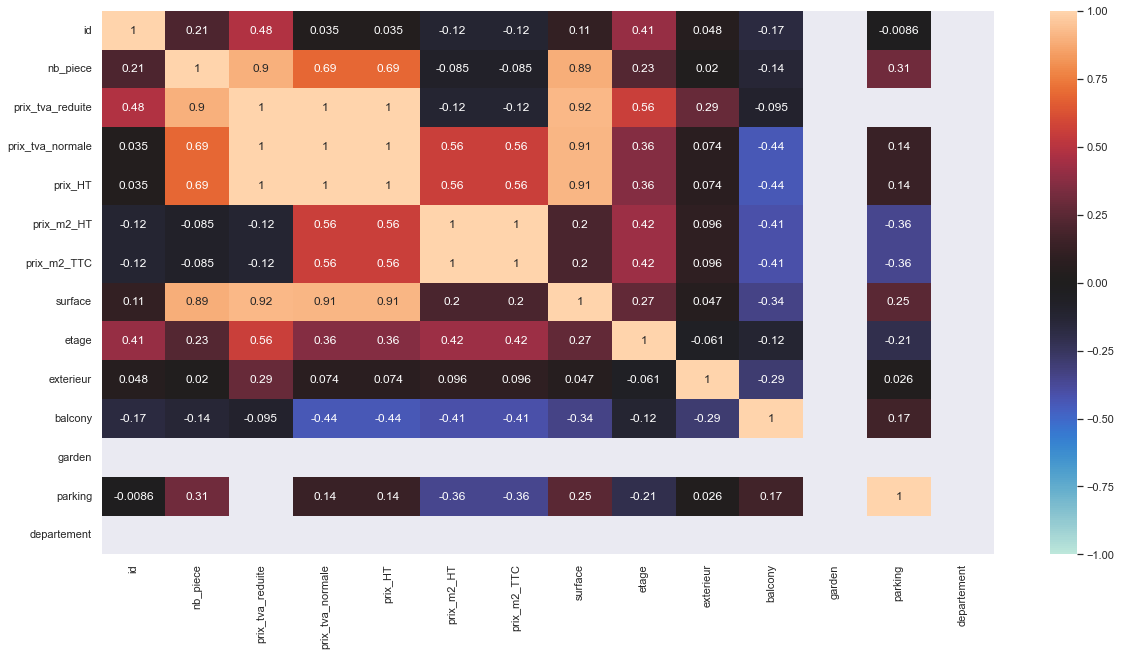

In [35]:
plt.figure(figsize=(20,10))
correlation = data_clermont.corr()
ax = sns.heatmap(correlation, vmin=-1, vmax=1, center=0, annot=True);

In [57]:
#! pip install yellowbrick

1.3.post1


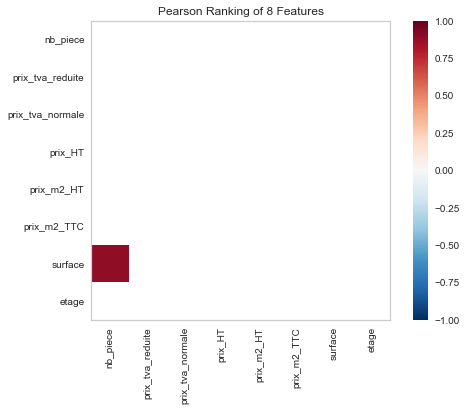

<AxesSubplot:title={'center':'Pearson Ranking of 8 Features'}>

In [58]:
#version de yellowbrick
import yellowbrick
print(yellowbrick.__version__)
#redondance entre les variables
#corrélations entre paires de variables
from yellowbrick.features import Rank2D
r2D = Rank2D(algorithm='pearson')
r2D.fit(X)
r2D.transform(X)
r2D.show()

## Modelisation

In [62]:
data_clermont.shape

(68, 23)

In [70]:
data_clermont.dropna(inplace=True)
#data_clermont.head()

In [6]:
#Valeurs manquantes
data.isnull().sum().sort_values(ascending=False)

prix_tva_reduite      2326
etage                  143
prix_tva_normale        14
prix_HT                 14
prix_m2_HT              14
prix_m2_TTC             14
id                       0
parking                  0
promoteur                0
adresse_entiere          0
date_fin_programme       0
departement              0
ville                    0
nom_programme            0
orientation              0
garden                   0
balcony                  0
exterieur                0
id_lot                   0
surface                  0
typologie                0
nb_piece                 0
date_extraction          0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
#Valeurs manquantes
data.isnull().sum().sort_values(ascending=False)

id                    0
exterieur             0
promoteur             0
adresse_entiere       0
date_fin_programme    0
departement           0
ville                 0
nom_programme         0
parking               0
garden                0
balcony               0
orientation           0
id_lot                0
etage                 0
surface               0
prix_m2_TTC           0
prix_m2_HT            0
prix_HT               0
prix_tva_normale      0
prix_tva_reduite      0
typologie             0
nb_piece              0
date_extraction       0
dtype: int64

In [71]:
#Valeurs manquantes
data_clermont.isnull().sum().sort_values(ascending=False)

id                    0
exterieur             0
promoteur             0
adresse_entiere       0
date_fin_programme    0
departement           0
ville                 0
nom_programme         0
parking               0
garden                0
balcony               0
orientation           0
id_lot                0
etage                 0
surface               0
prix_m2_TTC           0
prix_m2_HT            0
prix_HT               0
prix_tva_normale      0
prix_tva_reduite      0
typologie             0
nb_piece              0
date_extraction       0
dtype: int64

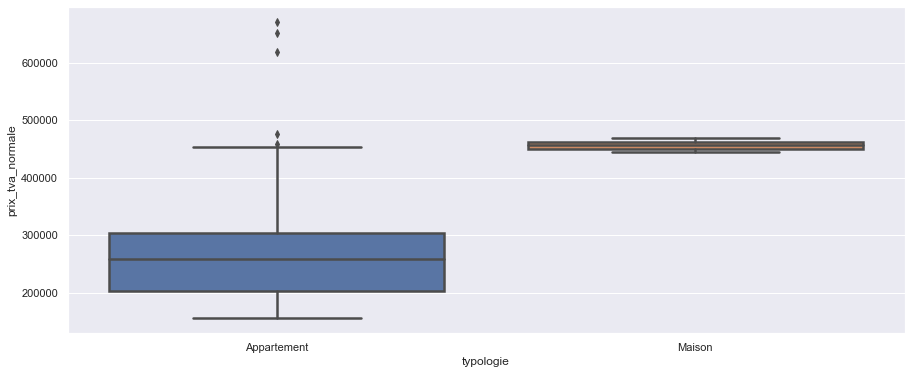

In [37]:
plt.figure(figsize = (15,6))
ax = sns.boxplot(x='typologie', y="prix_tva_normale", data=data_clermont, linewidth=2.5 )

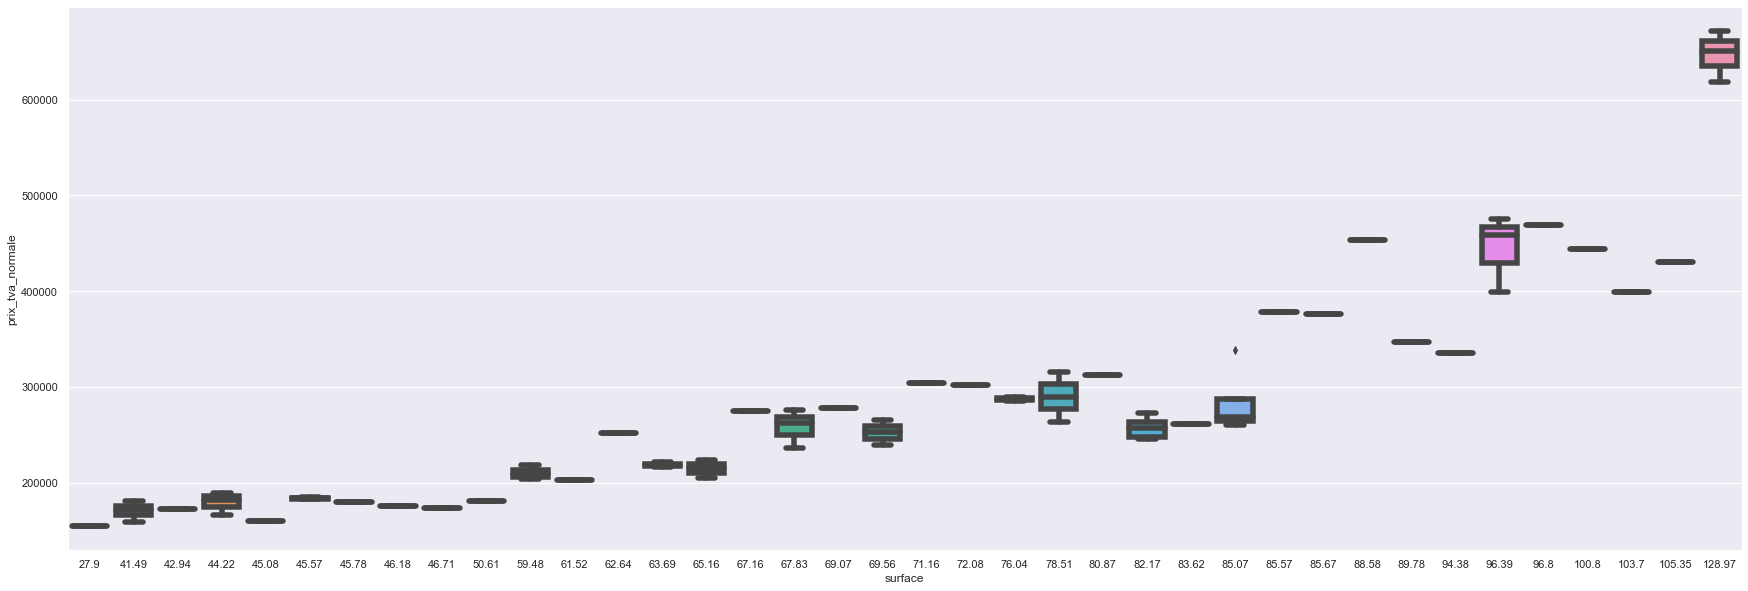

In [45]:
plt.figure(figsize = (30,10))
#sns.countplot('ville', data = data_clermont).set_title("Distribution du prix des biens immobiliers sur Clermont");
ax = sns.boxplot(x='surface', y="prix_tva_normale", data=data_clermont, linewidth=5.5)

3.0    0.378771
4.0    0.275173
2.0    0.224282
1.0    0.062159
5.0    0.058524
6.0    0.001091
Name: nb_piece, dtype: float64

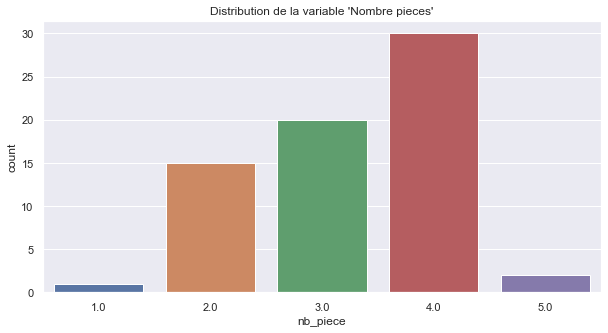

In [46]:
sns.countplot('nb_piece', data = data_clermont).set_title("Distribution de la variable 'Nombre pieces'");
#CONCLUSION : il faut regler ce probleme avant la Modelisation
data['nb_piece'].value_counts(normalize = True)

## Modelisation

In [11]:
y = data_clermont[['prix_tva_normale']]
X = data_clermont[['nb_piece', 'prix_tva_reduite','prix_tva_normale', 'prix_HT', 'prix_m2_HT', 'prix_m2_TTC', 'surface','etage', ]]

In [79]:
X,y = make_regression(n_samples=20, n_features=1, noise=15)

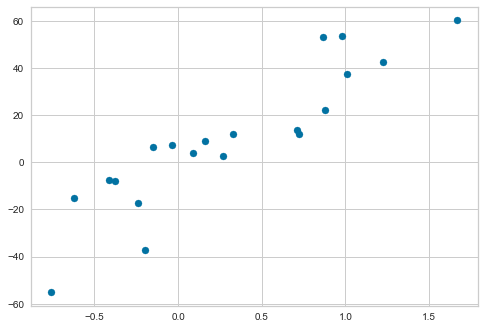

In [80]:
#Pour observer le tableau
plt.scatter(X, y)

In [12]:
y_data = data[['prix_tva_normale']]
X_data = data[['nb_piece', 'prix_tva_reduite','prix_tva_normale', 'prix_HT', 'prix_m2_HT', 'prix_m2_TTC', 'surface','etage', ]]

In [86]:
data.shape

(402, 23)

In [17]:
X_data, y_data = make_regression(n_samples=280, n_features=1, noise=15)

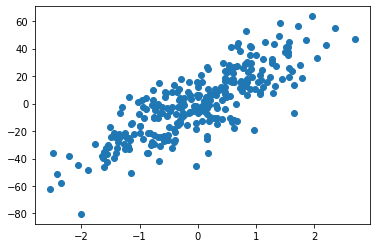

In [18]:
#Pour observer le tableau
plt.scatter(X_data, y_data)

In [14]:
#Il faut reecrir les dimension du vecteur Y
y = y_data.reshape(y_data.shape[0], 1)

In [19]:
#Fonction qui permet de generer les nbres aleatoires: random.randn() 
#Le vecteur theta a des dimensions (2,1): Contient 2 elts a et b (car c'est une regression lineaire)
theta = np.random.randn(2, 1)

#Verification des dimensions a=-0.99173532 et b=-0.83106243
theta.shape
print(theta)

#Conclusion: On A X, y, THETA, ON PEUT COMMENCE à TRAVAILLER SUR LE MODELE
#MODELE LINEAIRE : ECRIRE UNE FONCTION f(X)=aX + b  (F= k.theta)

[[ 0.71857275]
 [-0.13015698]]


In [20]:
#Creer une matrice X
#Permet de coller 2 vecteurs np On va colle le vecteur X 0 COTE DE CELUI DE 1
k=np.hstack((X_data, np.ones(X_data.shape)))

In [21]:
# Le modele est disponible on peut l'utilise au tant de fois que l'on veut

def modele(k, theta):
    #returne le produit matricienne de 
    return k.dot(theta)

# Texter le model
modele(k, theta)

array([[-0.01111473],
       [ 1.34047006],
       [ 1.55733806],
       [-1.47935859],
       [ 0.45953984],
       [-0.01619941],
       [-1.14971466],
       [-0.95977148],
       [-1.24566967],
       [-1.08911247],
       [-1.20074775],
       [ 0.21891054],
       [ 1.00031153],
       [-1.03868699],
       [ 0.40067801],
       [ 0.35617819],
       [-0.07728983],
       [ 0.46778335],
       [-0.15553104],
       [ 0.15915139],
       [ 0.86546306],
       [-0.12522521],
       [ 1.06069723],
       [-1.24923231],
       [ 1.80590443],
       [ 0.25843858],
       [ 0.11176968],
       [-1.94751869],
       [ 0.47536619],
       [-0.47933248],
       [ 0.39278651],
       [ 0.98357227],
       [-0.59282123],
       [ 0.72016559],
       [-0.97430266],
       [-0.34368654],
       [-0.98671185],
       [ 0.52470327],
       [ 0.31985606],
       [-0.15764657],
       [-1.02632064],
       [ 0.67388291],
       [ 0.45007424],
       [ 0.08496707],
       [ 0.51503875],
       [-1

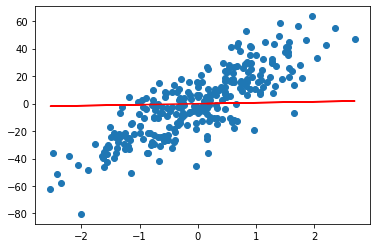

In [22]:
#Trace sur le model
plt.scatter(X_data, y_data)
#Le model EN ROUGE pas aboutit
plt.plot(X_data, modele(k, theta), c='r')

### CALCUL DE LA FONCTION COUT (ensemble des erreurs) J(theta)=1/2m*somme(k*theta-Y)^2

In [23]:
#Creer une fonction cout avec 3 variables
def cost_function(k, y_data, theta):
    m=len(y_data) #le vecteur Y a une longuer de 100
    return 1/(2*m) * sum((modele(k, theta) -y_data)**2)

#Faire le texte: donne un cout enorme CAR LE COUT EST SENCE TENDRE VERS ZERO
cost_function(k, y_data, theta)

array([2.70840986e+02, 5.64974509e+02, 1.51672585e+03, 1.14533797e+03,
       8.72524467e+01, 3.30472354e+02, 2.91869650e+02, 1.04671783e+02,
       8.88856307e+02, 2.39889676e+01, 2.99205577e+02, 1.17530179e+01,
       1.95782412e+02, 2.63173182e+02, 1.35450685e+02, 3.82746806e+02,
       1.25997033e+02, 1.40865276e+03, 1.69803337e+02, 7.23678339e+01,
       1.21842040e+03, 7.34731891e+01, 2.10547880e+01, 6.62392989e+02,
       1.11575068e+03, 3.39062536e+02, 1.08355210e+02, 1.93174141e+03,
       2.26485593e+01, 1.47169981e+02, 6.60810887e+01, 7.17980671e+02,
       2.33406872e+01, 1.19683687e+02, 5.34474149e+02, 1.00988727e+02,
       4.75517116e+02, 4.33510432e+02, 7.23122777e+01, 1.02157956e+03,
       5.51346834e+02, 5.18439338e+02, 4.23619065e+02, 4.57773271e+01,
       6.33028598e+02, 6.05387232e+02, 2.24376883e+02, 1.07143424e+03,
       2.86822013e+02, 2.30137039e+00, 3.54481008e+02, 1.19055233e+01,
       4.64240127e+01, 2.69910148e+01, 3.83054985e+02, 3.45224196e+02,
      

### CALCUL DU GRADIENT FORMULE dJ(theta)/d(theta)=1/m * k.T*(k*theta - Y)

In [24]:
# Creer une fonction 

def gradiant(k, y_data, theta):
    m = len(y_data)
    return 1/m * k.T.dot(modele(k, theta) - y_data) 

gradiant(k, y_data, theta)

array([[ 1.30049861e-01,  1.49834182e+00,  2.01478133e+00,
        -4.61635742e-01,  1.00713742e+00,  7.14454966e-02,
         1.08708297e-01,  3.42059892e-01, -3.24525007e-01,
         5.23971070e-01,  1.01445332e-01,  8.05172267e-01,
         1.16555145e+00,  1.38037111e-01,  1.08539781e+00,
         1.35521695e+00,  1.07131529e+00,  1.96669438e+00,
         2.46701865e-01,  9.78716690e-01,  1.87733001e+00,
         9.80922633e-01,  5.34553800e-01, -1.85790866e-01,
         1.82618337e+00,  1.31606511e+00,  3.35980688e-01,
        -8.05619485e-01,  8.50800856e-01,  2.77331752e-01,
         9.65835308e-01,  1.60132203e+00,  5.26250270e-01,
         1.06161380e+00, -9.66832981e-02,  3.48246664e-01,
        -5.20191975e-02,  1.39799996e+00,  4.00914710e-01,
        -3.97637158e-01, -1.09006034e-01,  1.46431091e+00,
         1.38986874e+00,  9.19349140e-01,  1.54567661e+00,
        -1.47253558e-01,  1.80365975e-01,  1.80338081e+00,
         1.26576117e+00,  6.41000756e-01,  1.33015723e+0

### ALGO DE LA DESCENTE DE GRADIENT  theta= theta - alpha*dJ(theta)/d(theta)

In [25]:
# Creer une fonction pour la descente de gradiant*

# lE PARAMETRE alpha=learning_rate + le nbre d'iterations
def descent_gran(k, y_data, theta, learning_rate, nbre_iterations):
    
    # Vu que c'est 1 algo iteratif on va ecrire une boucle for
    for i in range(0, nbre_iterations):  
        #Mettre à jour theta Cette algo va mettre à jour pendant nbre_iterations(1000); LA VALEUR DE THETA
        theta  = theta - learning_rate * gradiant(k, y_data, theta)
    # On quitte la boucle
    return theta
        
print(descent_gran(k, y_data, theta, learning_rate=0.01, nbre_iterations=1000))

[[ 3.50509574e-04 -3.89833763e-04 -6.69264295e-04  6.70653598e-04
  -1.24057220e-04  3.82218706e-04  3.62056879e-04  2.35797058e-04
   5.96466931e-04  1.37370163e-04  3.65986660e-04 -1.47796987e-05
  -2.09770485e-04  3.46187903e-04 -1.66401661e-04 -3.12393021e-04
  -1.58782016e-04 -6.43245830e-04  2.87392538e-04 -1.08679583e-04
  -5.94893345e-04 -1.09873155e-04  1.31644153e-04  5.21401887e-04
  -5.67219374e-04 -2.91209089e-04  2.39086340e-04  8.56773285e-04
  -3.94680127e-05  2.70819588e-04 -1.01709839e-04 -4.45553385e-04
   1.36136954e-04 -1.53532820e-04  4.73188351e-04  2.32449574e-04
   4.49021893e-04 -3.35541675e-04  2.03952412e-04  6.36025809e-04
   4.79855828e-04 -3.71420617e-04 -3.31142106e-04 -7.65575133e-05
  -4.15445253e-04  5.00550461e-04  3.23284975e-04 -5.54881569e-04
  -2.63991076e-04  7.40487735e-05 -2.98833930e-04 -1.51922093e-05
   1.72769680e-04  1.42872860e-04  4.07871101e-04  3.89609649e-04
   4.65337581e-04 -1.23024610e-05 -3.08000030e-05 -4.09182245e-04
  -1.69235

### ENTRAINEMENT DU MODEL : MACHINE LEARNING

In [26]:
# C'est le parametres de theta final a=1.68224812 et b= -1.40060318
#learning_rate (LES PLAT DANS LA DESCENTE DE GRADIANT)
theta_final = descent_gran(k, y_data, theta, learning_rate=0.01, nbre_iterations=1000)
theta_final

array([[ 3.50509574e-04, -3.89833763e-04, -6.69264295e-04,
         6.70653598e-04, -1.24057220e-04,  3.82218706e-04,
         3.62056879e-04,  2.35797058e-04,  5.96466931e-04,
         1.37370163e-04,  3.65986660e-04, -1.47796987e-05,
        -2.09770485e-04,  3.46187903e-04, -1.66401661e-04,
        -3.12393021e-04, -1.58782016e-04, -6.43245830e-04,
         2.87392538e-04, -1.08679583e-04, -5.94893345e-04,
        -1.09873155e-04,  1.31644153e-04,  5.21401887e-04,
        -5.67219374e-04, -2.91209089e-04,  2.39086340e-04,
         8.56773285e-04, -3.94680127e-05,  2.70819588e-04,
        -1.01709839e-04, -4.45553385e-04,  1.36136954e-04,
        -1.53532820e-04,  4.73188351e-04,  2.32449574e-04,
         4.49021893e-04, -3.35541675e-04,  2.03952412e-04,
         6.36025809e-04,  4.79855828e-04, -3.71420617e-04,
        -3.31142106e-04, -7.65575133e-05, -4.15445253e-04,
         5.00550461e-04,  3.23284975e-04, -5.54881569e-04,
        -2.63991076e-04,  7.40487735e-05, -2.98833930e-0

### VOIR SI LES PARAMETRES DE THETA_FINAL NOUS DONNE DES BONS RESULTS

In [27]:
#CREER UN VECTEUR DE PREDICTIONS = AU MODELE(k, theta_final)
vecteur_prediction = modele(k, theta_final)
vecteur_prediction

array([[-23.40975076,  33.4583408 ,  54.92227548, ..., -16.15679093,
         15.80404834,  -2.39200241],
       [-23.40909147,  33.45760755,  54.92101664, ..., -16.15630925,
         15.80374739,  -2.39185779],
       [-23.40898569,  33.4574899 ,  54.92081465, ..., -16.15623196,
         15.80369911,  -2.39183459],
       ...,
       [-23.41015414,  33.45878944,  54.9230457 , ..., -16.15708565,
         15.80423248,  -2.3920909 ],
       [-23.40944803,  33.45800411,  54.92169744, ..., -16.15656975,
         15.80391015,  -2.39193601],
       [-23.41013929,  33.45877292,  54.92301734, ..., -16.1570748 ,
         15.8042257 ,  -2.39208764]])

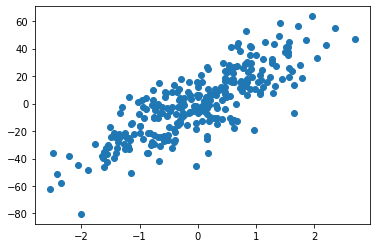

In [31]:
#plt.modele(k, theta_final)

#Trace sur le model
plt.scatter(X_data.reshape(-1, 1), y_data.reshape(-1, 1))  # C'est la DATASET
#Le model EN ROUGE aboutit
#plt.plot(X_data, vecteur_prediction , c='r');